In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import sys
sys.path.insert(1,".")
from visualize import plot_grid_search,filter_df,get_concat_losses,get_inputs_linreg
from statistics import student_test

## Visualizations

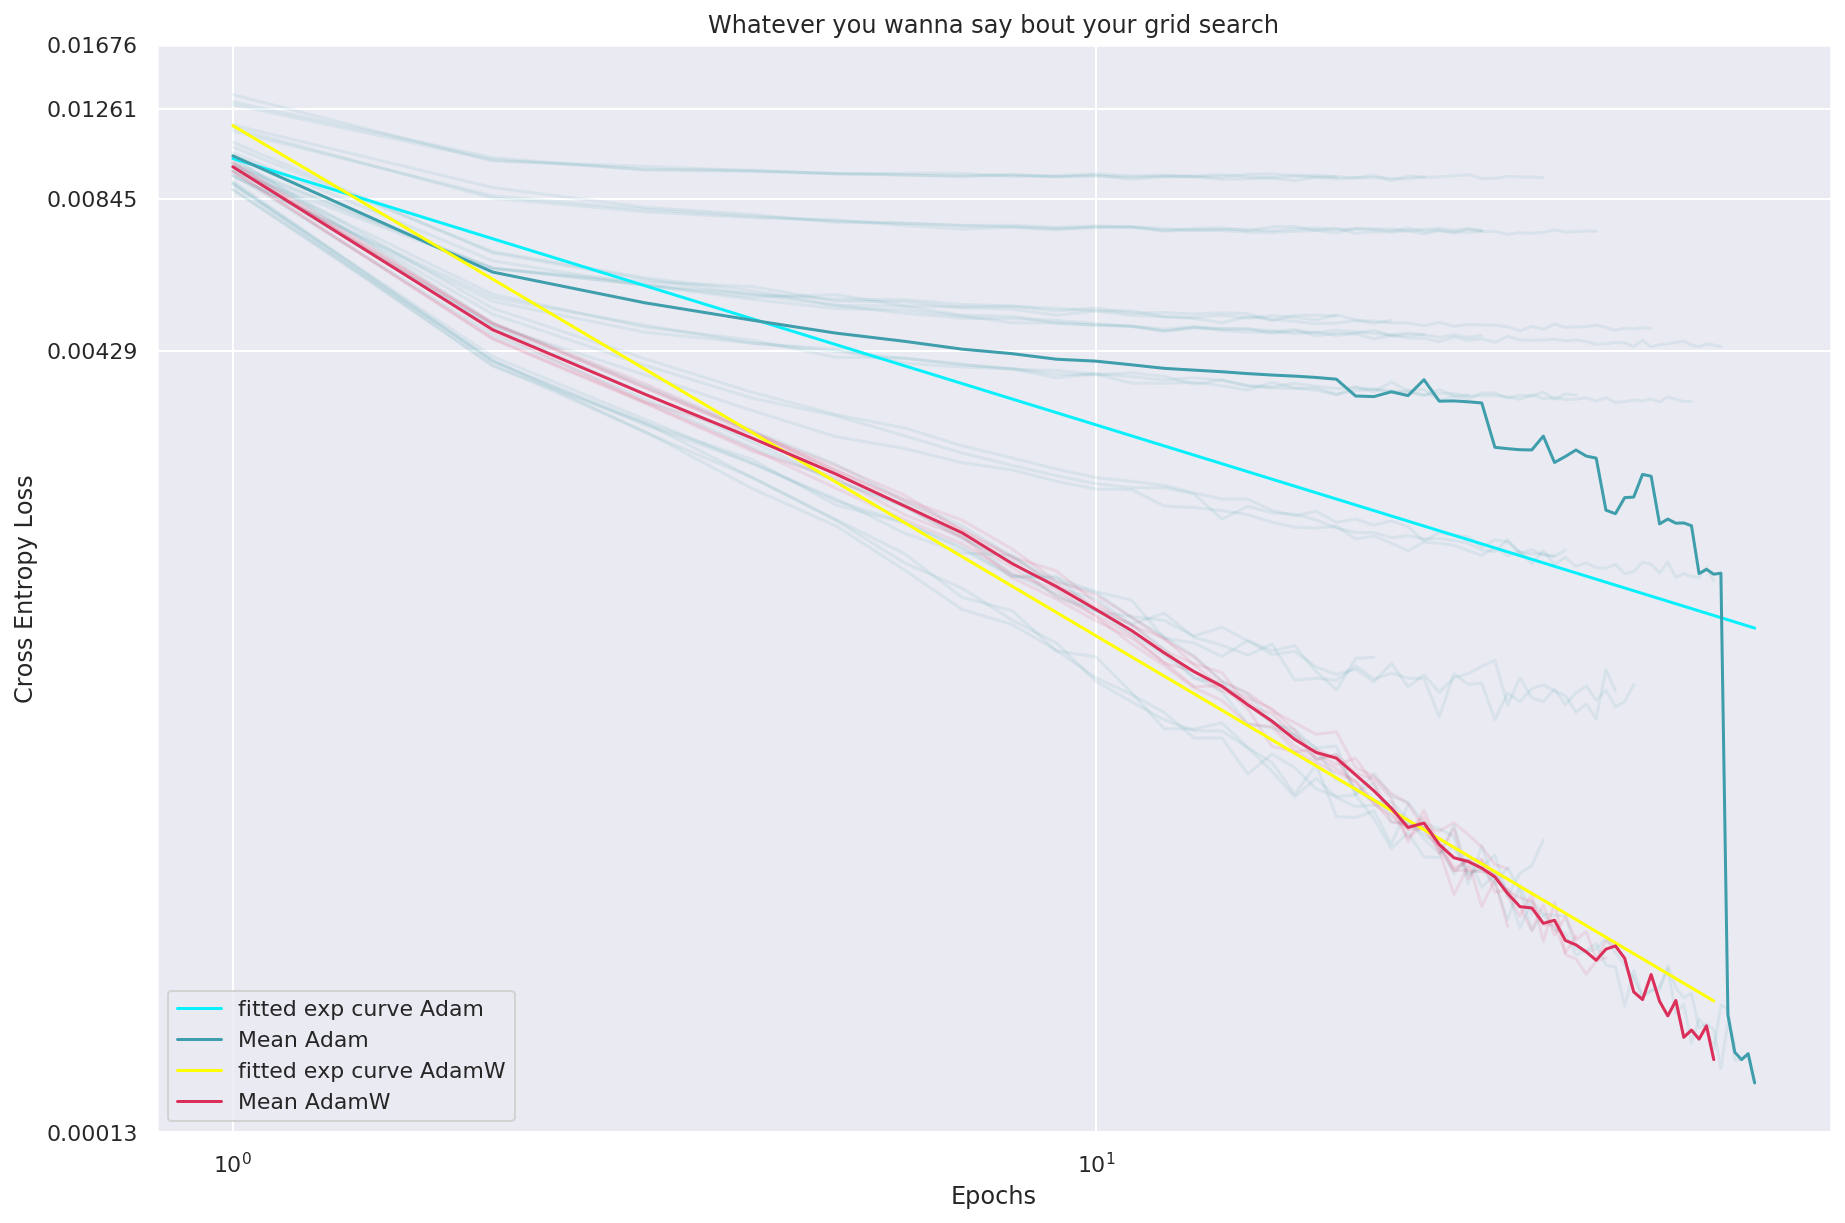

In [4]:
df = pd.read_json("./log/log_images_results.json")
df = filter_df(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
ax.set_xscale('log')
plot_grid_search(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
ax.set_title("Whatever you wanna say bout your grid search")
fig.savefig("output_file.png")

## Statistics test

In [6]:
adam_df = df[df.optimizer == 'Adam']
adamW_df = df[df.optimizer == 'AdamW']
sgd_df = df[df.optimizer == 'SGD']
train = False
adam_concat_losses = get_concat_losses(adam_df,train)
adamW_concat_losses = get_concat_losses(adamW_df,train)

x_adam, y_adam= get_inputs_linreg(adam_concat_losses)
x_adamw, y_adamw = get_inputs_linreg(adamW_concat_losses)
student_test(x_adam,y_adam,x_adamw,y_adamw)

0.1061409201641641